### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
from gate_variants.cx_variants import CX_Variant_Gate 
from orientation_map import orientation_map_gen
from trios_bench.qft_adder import generate_qft_adder

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Load device and the device configuration object ###

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [4]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [5]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [6]:
from level3_context import _parse_transpile_args
from level3_context_pulse import level_3_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [7]:
t5 = generate_qft_adder(6)

In [8]:
t5.draw()

┌──────┐┌───────┐                  ┌────────────┐              »
q_0: ┤0     ├┤ Rz(π) ├──────────────────┤ Rz(1.7725) ├──────────────»
     │      │└───┬───┘         ┌───────┐└─────┬──────┘              »
q_1: ┤1 QFT ├────┼─────────────┤ Rz(π) ├──────┼─────────────────────»
     │      │    │    ┌───────┐└───┬───┘      │       ┌────────────┐»
q_2: ┤2     ├────┼────┤ Rz(π) ├────┼──────────┼───────┤ Rz(1.7725) ├»
     └──────┘    │    └───┬───┘    │          │       └─────┬──────┘»
q_3: ────────────┼────────┼────────■──────────┼─────────────┼───────»
                 │        │                   │             │       »
q_4: ────────────┼────────■───────────────────┼─────────────■───────»
                 │                            │                     »
q_5: ────────────■────────────────────────────■─────────────────────»
                                                                    »
«                   ┌────────────┐                            ┌───────┐
«q_0: ──────────────┤ Rz(1.3313) ├────────────────────────────┤0      ├
«     ┌────────────┐└─────┬──────┘              ┌────────────┐│       │
«q_1: ┤ Rz(1.7725) ├──────┼─────────────────────┤ Rz(1.3313) ├┤1 IQFT ├
«     └─────┬──────┘      │       ┌────────────┐└─────┬──────┘│       │
«q_2: ──────┼─────────────┼───────┤ Rz(1.3313) ├──────┼───────┤2      ├
«           │             │       └─────┬──────┘      │       └───────┘
«q_3: ──────■─────────────┼─────────────┼─────────────■────────────────
«                         │             │                              
«q_4: ────────────────────┼─────────────■──────────────────────────────
«                         │                                            
«q_5: ────────────────────■────────────────────────────────────────────
«

In [9]:
backend = provider.get_backend('ibmq_jakarta')

In [10]:
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

In [11]:
backend_prop = backend.properties()

In [12]:
orientation_map = orientation_map_gen(backend)

In [13]:
transpile_args = _parse_transpile_args([t5], backend, seed_transpiler = 0, orientation_map = orientation_map)

In [14]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [15]:
print(pass_manager_config.orientation_map)

{(0, 1): 'f', (1, 0): 'b', (1, 2): 'b', (1, 3): 'f', (2, 1): 'f', (3, 1): 'b', (3, 5): 'f', (4, 5): 'b', (5, 3): 'b', (5, 4): 'f', (5, 6): 'b', (6, 5): 'f'}


In [16]:
pm_context = level_3_pulse_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [17]:
pm_orign = level_3_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [18]:
t_circ = pm_context.run(t5)

QFT
QFT
IQFT
IQFT
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(6, 'q'), 0),
5: Qubit(QuantumRegister(6, 'q'), 1),
3: Qubit(QuantumRegister(6, 'q'), 2),
2: Qubit(QuantumRegister(6, 'q'), 3),
1: Qubit(QuantumRegister(6, 'q'), 4),
0: Qubit(QuantumRegister(6, 'q'), 5)
})
intersect [Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 1)]
intersect [Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(7, 'q'), 3)]
intersect [Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumR

In [19]:
t_orign = pm_orign.run(t5)

QFT
QFT
IQFT
IQFT
No solution found:  nonexistent solution
Layout({
4: Qubit(QuantumRegister(6, 'q'), 0),
5: Qubit(QuantumRegister(6, 'q'), 1),
3: Qubit(QuantumRegister(6, 'q'), 2),
2: Qubit(QuantumRegister(6, 'q'), 3),
1: Qubit(QuantumRegister(6, 'q'), 4),
0: Qubit(QuantumRegister(6, 'q'), 5)
})


In [20]:
t_circ.count_ops()

OrderedDict([('rz', 97),
             ('rx', 46),
             ('ry', 46),
             ('acecr_pm', 32),
             ('sx', 17),
             ('cx', 16),
             ('x', 3)])

In [21]:
t_circ.draw()

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/sympy/core/expr.py:3951: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  deprecated_since_version="1.9").warn()


global phase: 2π
                                                                              »
      q_5 -> 0 ───────────────────────────────────────────────────────────────»
               ┌───────────┐ ┌──────────┐┌──────────┐┌──────────┐┌───────────┐»
      q_4 -> 1 ┤1          ├─┤ Rx(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├┤1          ├»
               │  Acecr_pm │ └┬───────┬─┘├──────────┤├─────────┬┘│  Acecr_pm │»
      q_3 -> 2 ┤0          ├──┤ Ry(π) ├──┤ Rz(-π/2) ├┤ Ry(π/2) ├─┤0          ├»
               └─┬────────┬┘  └─┬────┬┘  └──────────┘└──┬────┬─┘ └───────────┘»
      q_2 -> 3 ──┤ Rz(-π) ├─────┤ √X ├────────■─────────┤ √X ├─────────■──────»
                 └────────┘     └────┘        │         └────┘         │      »
      q_0 -> 4 ───────────────────────────────┼────────────────────────┼──────»
               ┌────────────┐   ┌────┐      ┌─┴─┐    ┌─────────┐     ┌─┴─┐    »
      q_1 -> 5 ┤ Rz(2.2515) ├───┤ √X ├──────┤ X ├────┤ Rz(π/2) ├─────┤ X ├────»
               └────────────┘   └────┘      └───┘    └─────────┘     └───┘    »
ancilla_0 -> 6 ───────────────────────────────────────────────────────────────»
                                                                              »
«                                                                              »
«      q_5 -> 0 ───────────────────────────────────────────────────────────────»
«               ┌──────────┐ ┌────────┐ ┌───────────┐ ┌──────────┐             »
«      q_4 -> 1 ┤ Ry(-π/2) ├─┤ Rz(-π) ├─┤1          ├─┤ Rx(-π/2) ├─────────────»
«               ├──────────┤┌┴────────┴┐│  Acecr_pm │ └┬───────┬─┘ ┌──────────┐»
«      q_3 -> 2 ┤ Rx(-π/2) ├┤ Rz(-π/2) ├┤0          ├──┤ Ry(π) ├───┤ Rz(-π/2) ├»
«               └──┬────┬──┘└──────────┘├───────────┴┐ └─┬────┬┘   ├──────────┤»
«      q_2 -> 3 ───┤ √X ├────────■──────┤ Rz(1.4661) ├───┤ √X ├────┤ Rz(-π/2) ├»
«                  └────┘        │      └────────────┘   └────┘   ┌┴──────────┤»
«      q_0 -> 4 ─────────────────┼────────────────────────────────┤1          ├»
«               ┌─────────┐    ┌─┴─┐        ┌───┐     ┌──────────┐│  Acecr_pm │»
«      q_1 -> 5 ┤ Rz(π/4) ├────┤ X ├────────┤ X ├─────┤ Rz(3π/8) ├┤0          ├»
«               └─────────┘    └───┘        └───┘     └──────────┘└───────────┘»
«ancilla_0 -> 6 ───────────────────────────────────────────────────────────────»
«                                                                              »
«                                                                        »
«      q_5 -> 0 ─────────────────────────────────────────────────────────»
«                                                                        »
«      q_4 -> 1 ─────────────────────────────────────────────────────────»
«               ┌─────────┐  ┌───────┐                                   »
«      q_3 -> 2 ┤ Rz(π/2) ├──┤ Ry(π) ├───────────────────────────────────»
«               └─────────┘  └───────┘                                   »
«      q_2 -> 3 ─────────────────────────────────────────────────────────»
«               ┌──────────┐┌──────────┐┌─────────┐         ┌───────────┐»
«      q_0 -> 4 ┤ Rx(-π/2) ├┤ Rz(-π/8) ├┤ Rx(π/2) ├─────────┤1          ├»
«               └┬───────┬─┘├──────────┤├─────────┤┌───────┐│  Acecr_pm │»
«      q_1 -> 5 ─┤ Ry(π) ├──┤ Rz(-π/2) ├┤ Rz(π/2) ├┤ Ry(π) ├┤0          ├»
«                └───────┘  └──────────┘└─────────┘└───────┘└───────────┘»
«ancilla_0 -> 6 ─────────────────────────────────────────────────────────»
«                                                                        »
«                                                                   »
«      q_5 -> 0 ────────────────────────────────────────────────────»
«                                                                   »
«      q_4 -> 1 ────────────────────────────────────────────────────»
«                                                                   »
«      q_3 -> 2 ────────────────────────────────────────────────────»
«               ┌──────

In [22]:
out = superstaq_provider.ibmq_compile(t_circ, target="ibmq_jakarta_qpu")

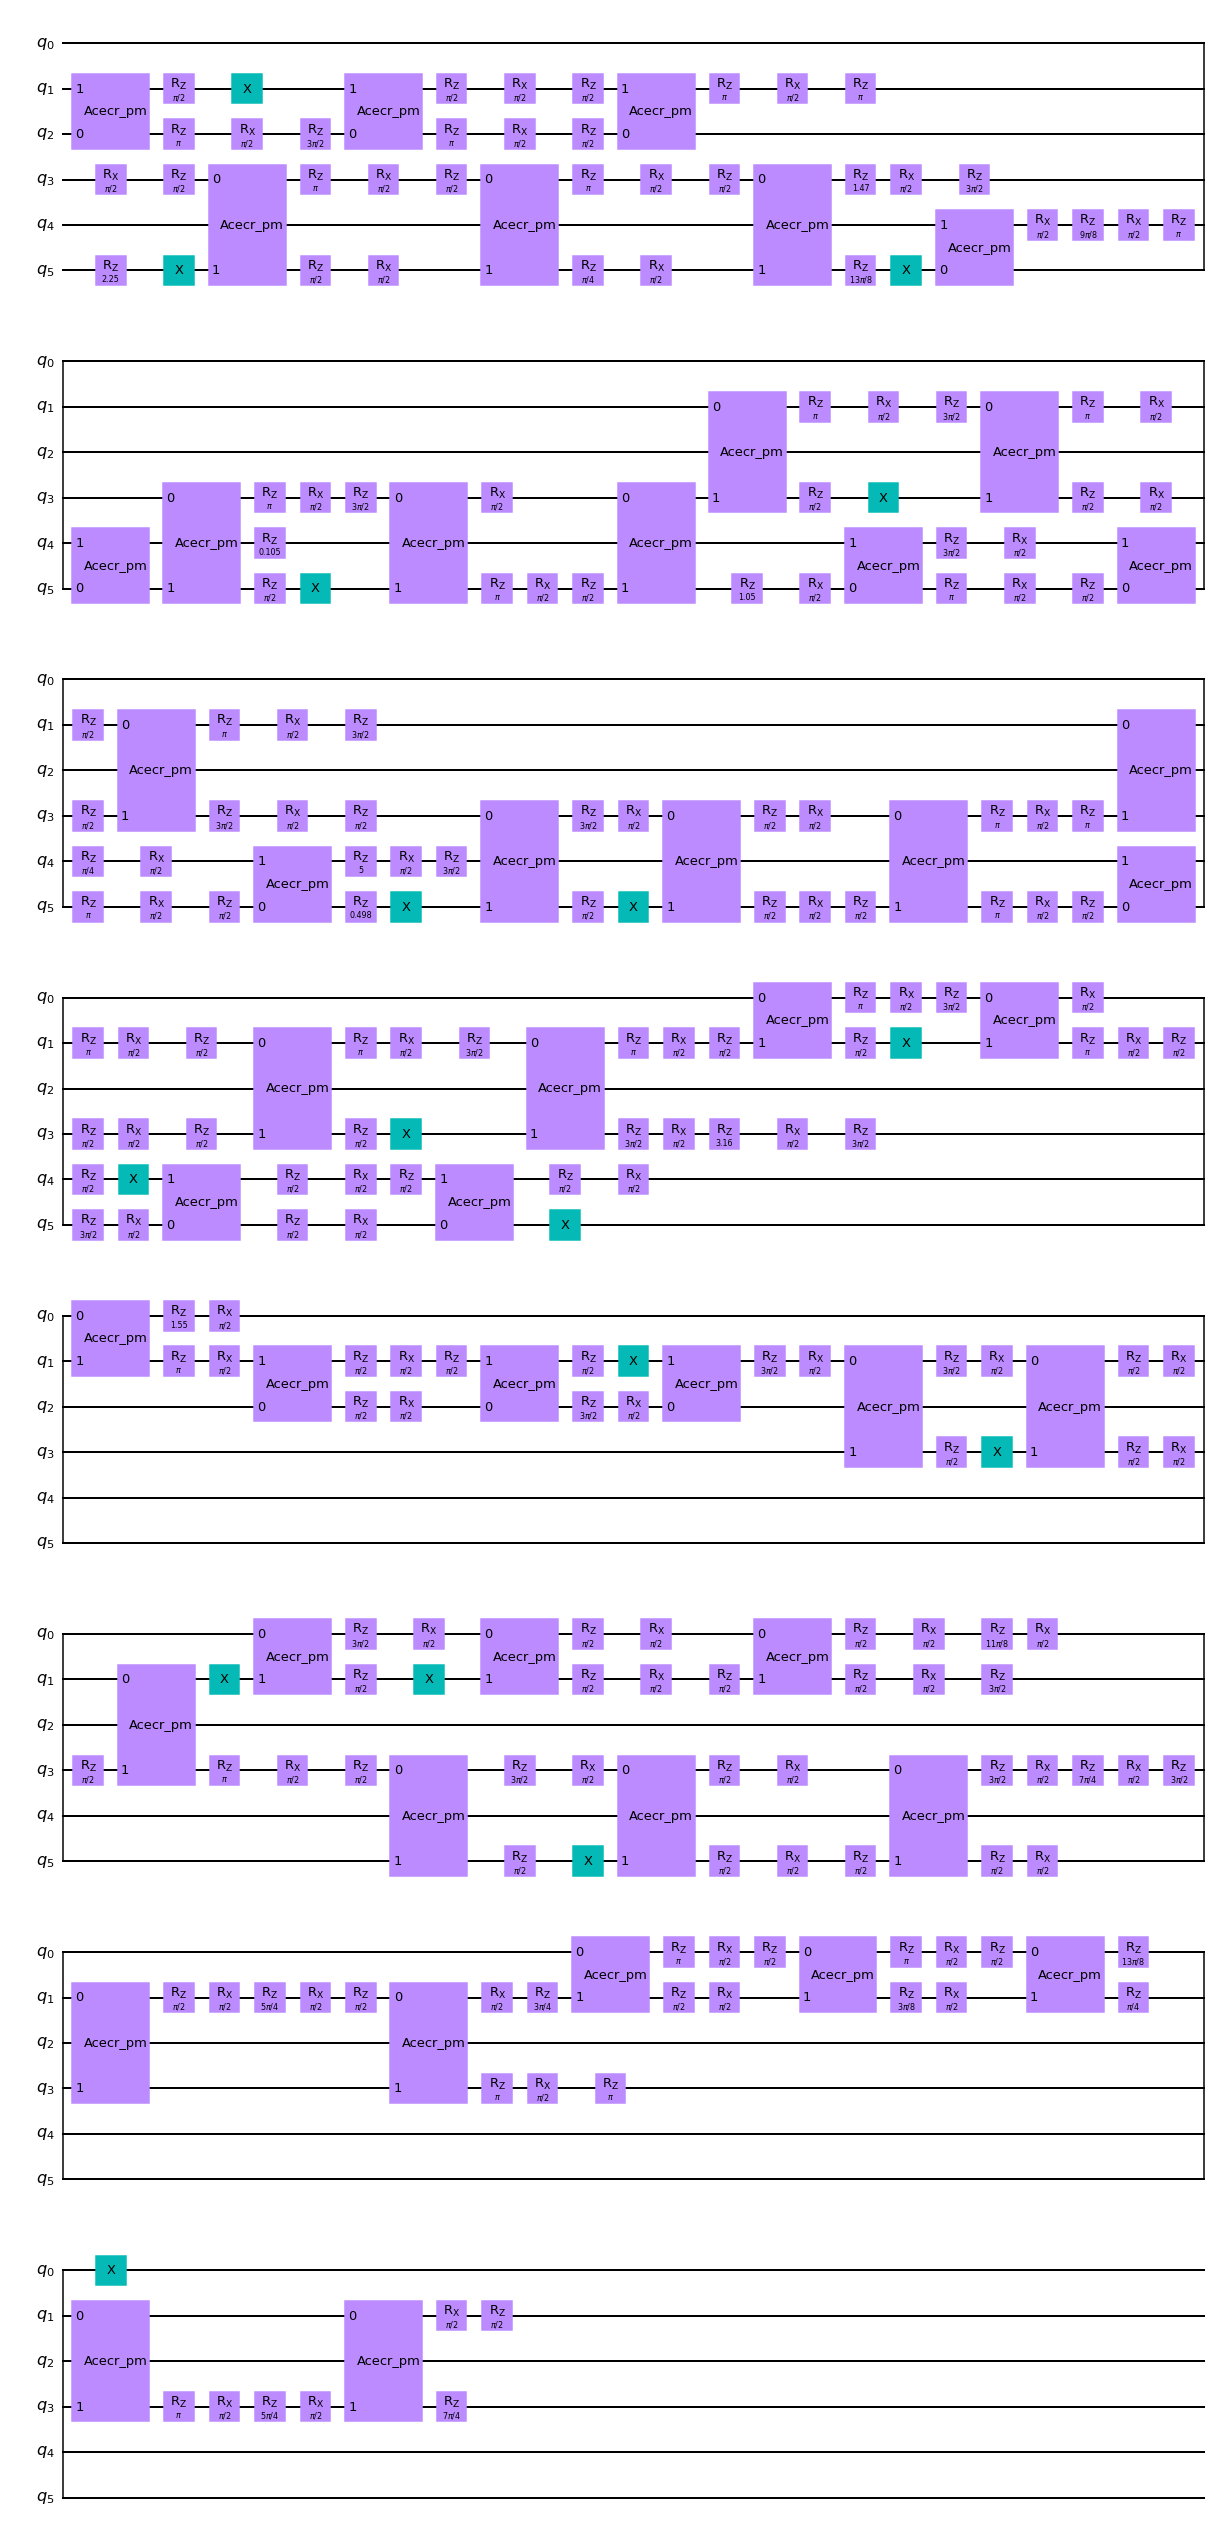

In [23]:
out.circuit.draw(output='mpl')

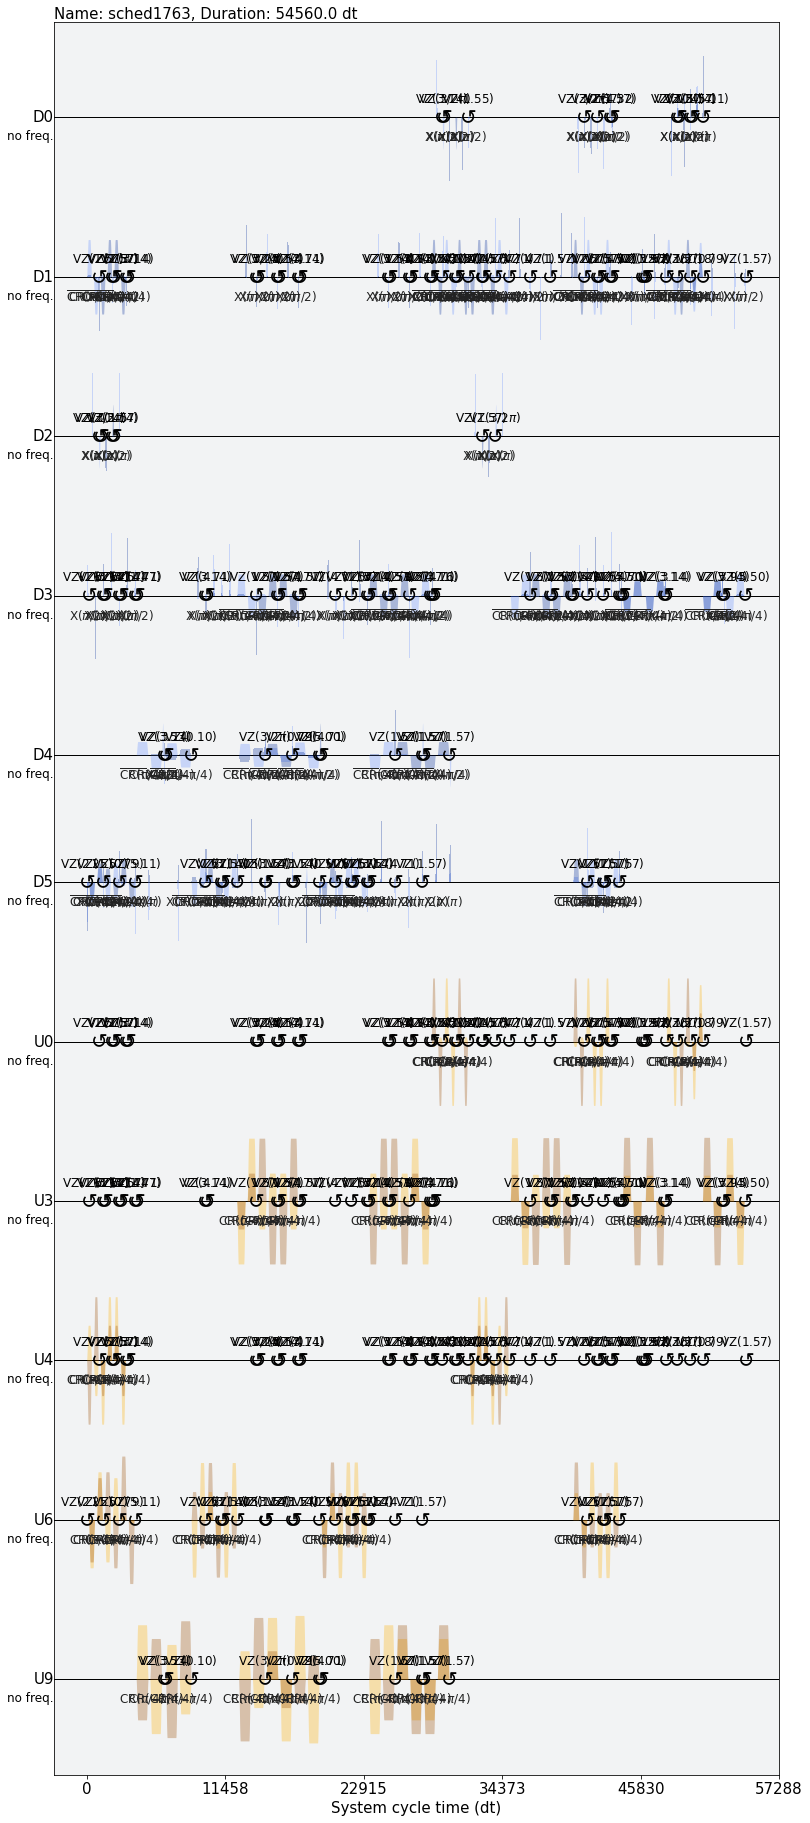

In [24]:
out.pulse_sequence.draw()

In [25]:
out.circuit.count_ops()

OrderedDict([('rz', 132), ('rx', 77), ('acecr_pm', 48), ('x', 17)])

In [26]:
out2 = superstaq_provider.ibmq_compile(t_orign, target="ibmq_jakarta_qpu")

In [27]:
out2.circuit.count_ops()

OrderedDict([('rz', 136), ('rx', 78), ('acecr_pm', 48), ('x', 24)])

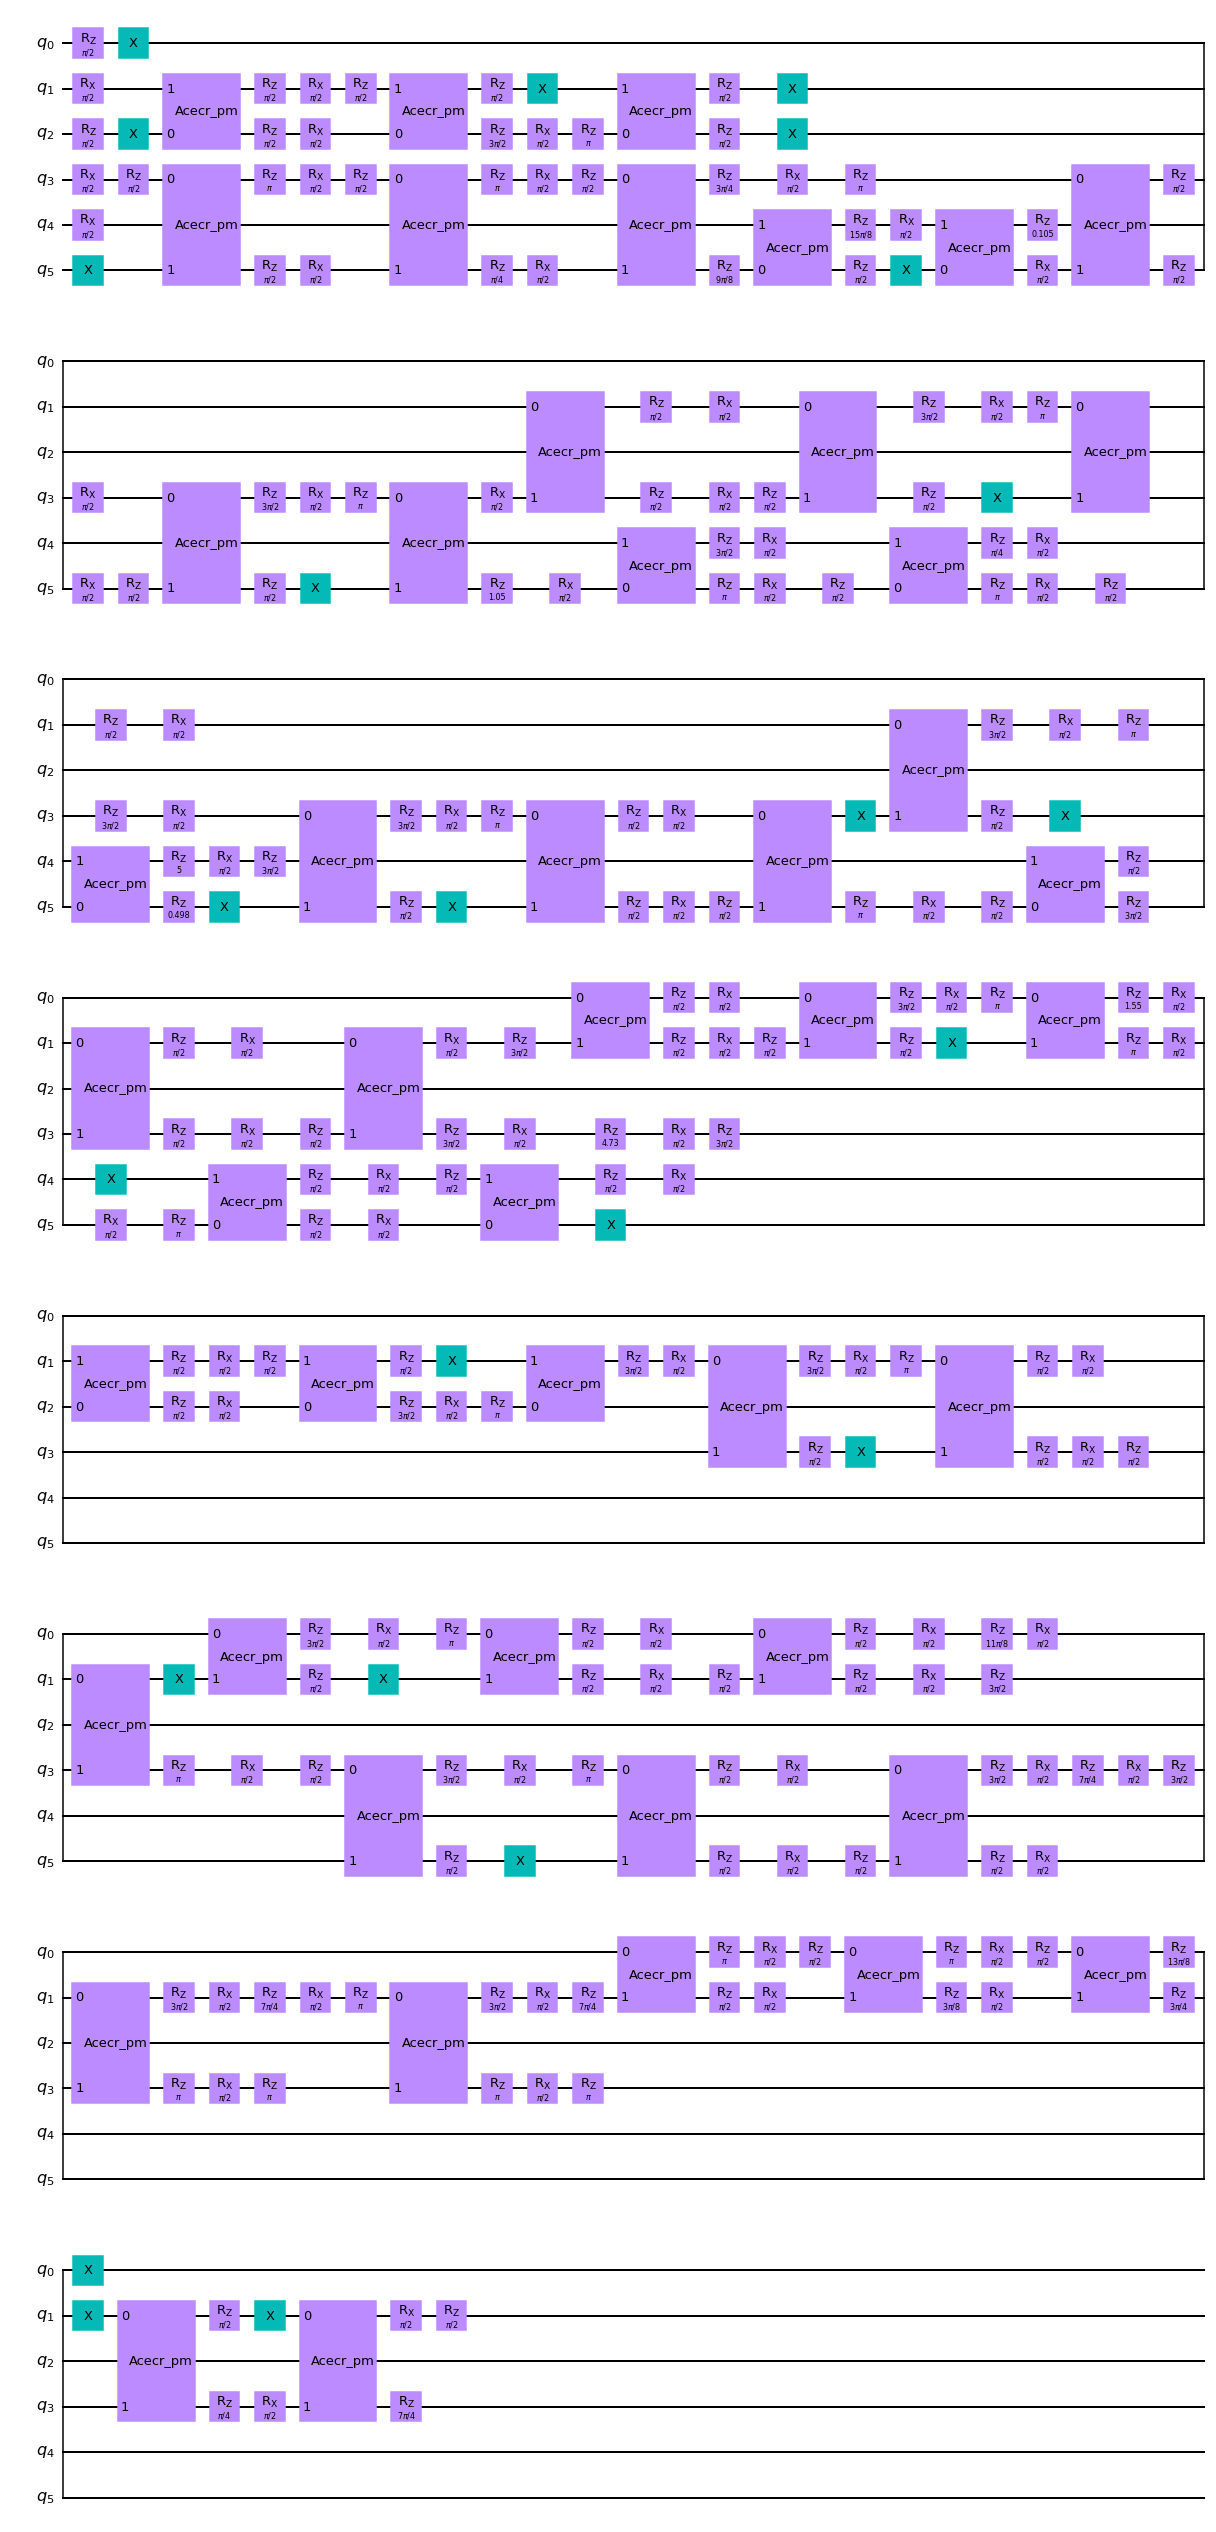

In [28]:
out2.circuit.draw(output='mpl')

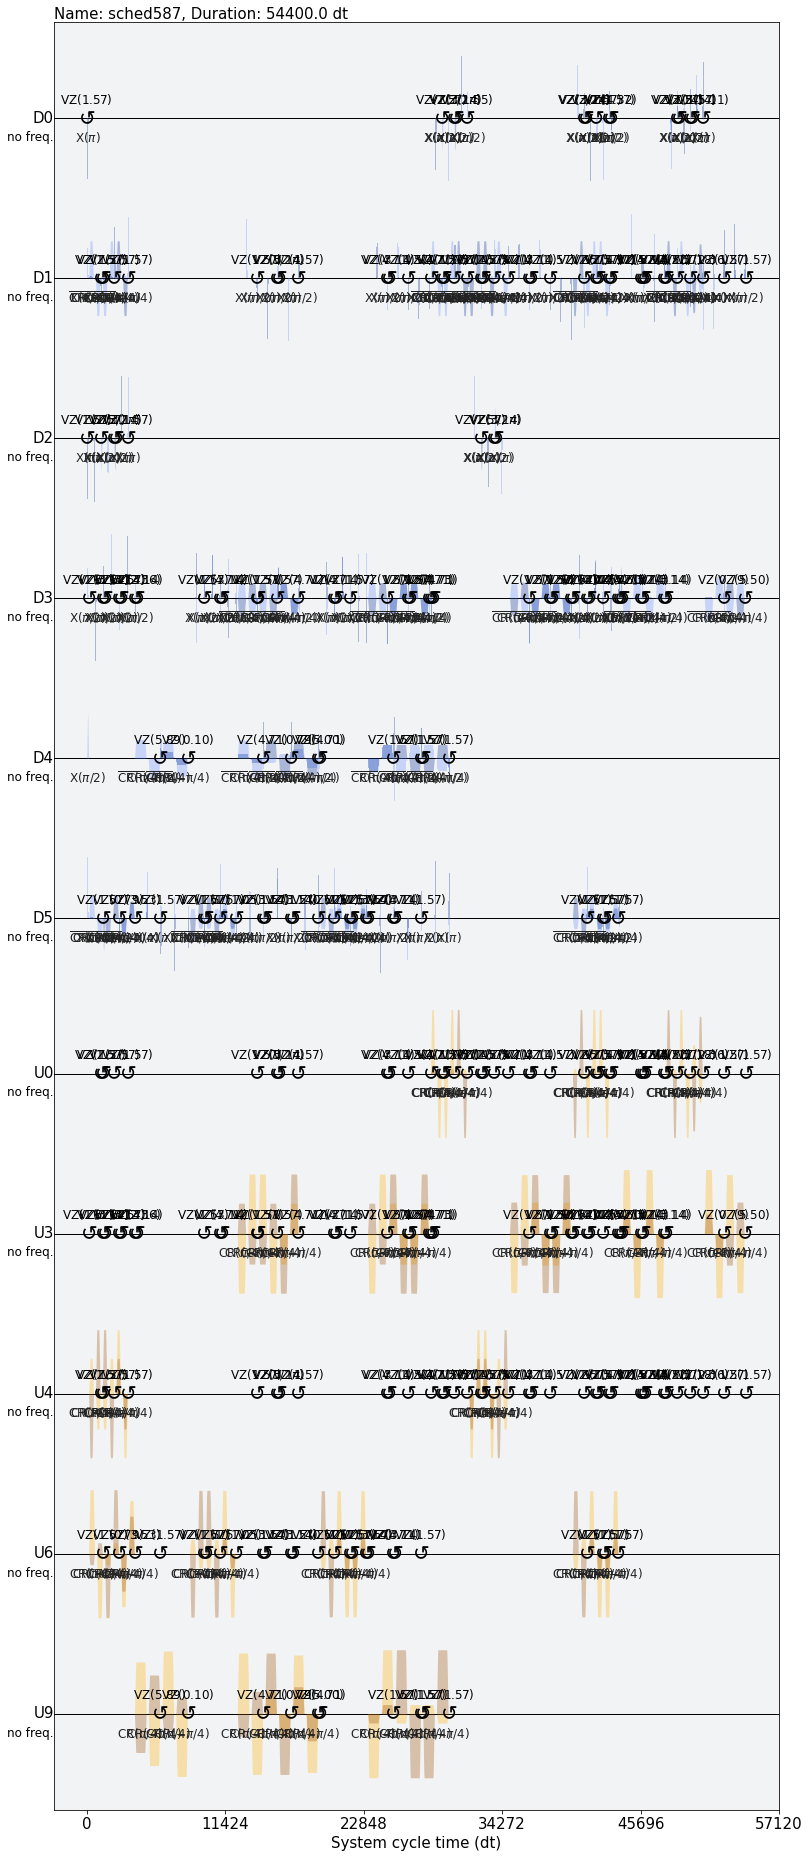

In [29]:
out2.pulse_sequence.draw()

In [114]:
t_orign = transpile(t5, backend, optimization_level = 3)

In [28]:
t_orign_schedule = schedule(
            circuits=t_orign,
            backend=backend,
            inst_map=None,
            meas_map=None,
            method=None,
        )

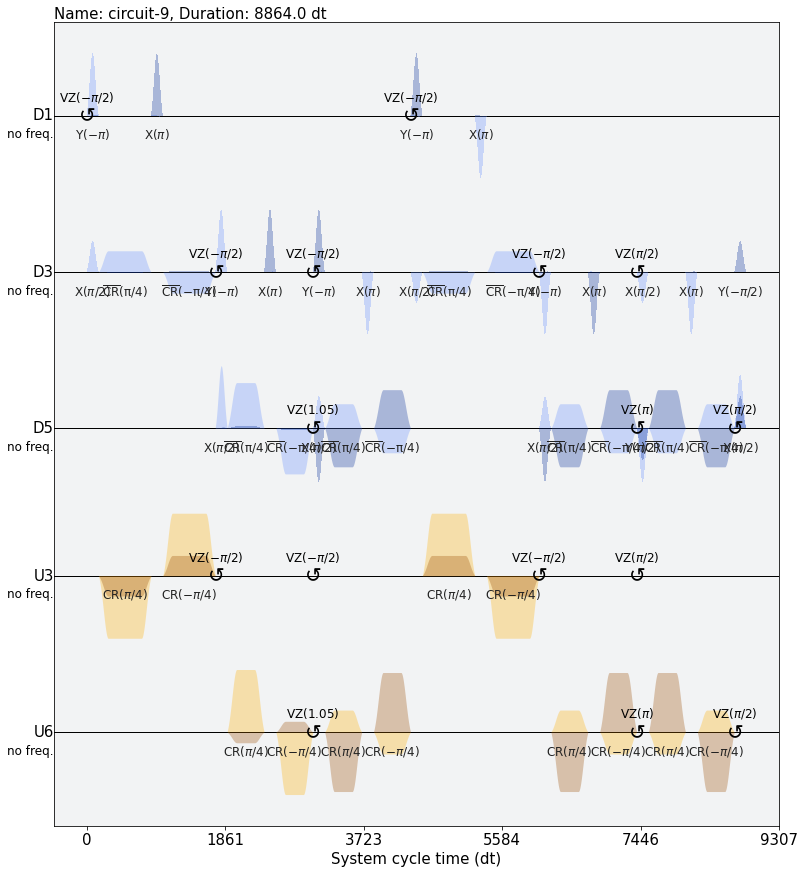

In [29]:
t_orign_schedule.draw()

In [30]:
#19

In [31]:
t_orign_schedule.children[5]

(6080,
 Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(3))), (0, ShiftPhase(1.5707963267948966, ControlChannel(3))), (0, ShiftPhase(1.5707963267948966, ControlChannel(8))), (0, Play(Drag(duration=160, amp=(-3.554362359433285e-17-0.19349047479964404j), sigma=40, beta=0.557336464289407, name='Ym_d3'), DriveChannel(3), name='Ym_d3')), (0, Play(Drag(duration=160, amp=(0.09343255413184134+0.0013155736420234682j), sigma=40, beta=-0.8260101223075255, name='X90p_d5'), DriveChannel(5), name='X90p_d5')), (160, Play(GaussianSquare(duration=496, amp=(0.06823970936107211+0.0029056778790278004j), sigma=64, width=240, name='CR90p_d5_u6'), DriveChannel(5), name='CR90p_d5_u6')), (160, Play(GaussianSquare(duration=496, amp=(0.4793427847550843-0.08228725735534022j), sigma=64, width=240, name='CR90p_u6'), ControlChannel(6), name='CR90p_u6')), (656, Play(Drag(duration=160, amp=(0.19349047479964404+0j), sigma=40, beta=0.557336464289407, name='Xp_d3'), DriveChannel(3), name='Xp_d3')), (816, Play(Ga

In [32]:
help(t_orign_schedule)

Help on Schedule in module qiskit.pulse.schedule object:

class Schedule(builtins.object)
 |  Schedule(*schedules: Union[ForwardRef('Schedule'), qiskit.pulse.instructions.instruction.Instruction, Tuple[int, Union[ForwardRef('Schedule'), qiskit.pulse.instructions.instruction.Instruction]]], name: Union[str, NoneType] = None, metadata: Union[dict, NoneType] = None)
 |  
 |  A quantum program *schedule* with exact time constraints for its instructions, operating
 |  over all input signal *channels* and supporting special syntaxes for building.
 |  
 |  Pulse program representation for the original Qiskit Pulse model [1].
 |  Instructions are not allowed to overlap in time
 |  on the same channel. This overlap constraint is immediately
 |  evaluated when a new instruction is added to the ``Schedule`` object.
 |  
 |  It is necessary to specify the absolute start time and duration
 |  for each instruction so as to deterministically fix its execution time.
 |  
 |  The ``Schedule`` program s

In [33]:
t_orign_schedule.instructions

((0, ShiftPhase(1.5707963267948966, DriveChannel(1))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(0))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(4))),
 (0, ShiftPhase(1.5707963267948966, ControlChannel(5))),
 (0,
  Play(Drag(duration=160, amp=(-3.5177580880852906e-17-0.19149783107719934j), sigma=40, beta=-1.0249306744293878, name='Ym_d1'), DriveChannel(1), name='Ym_d1')),
 (0,
  Play(Drag(duration=160, amp=(0.09672086584553752-0.0002442998264774194j), sigma=40, beta=0.5292268605797695, name='X90p_d3'), DriveChannel(3), name='X90p_d3')),
 (160,
  Play(GaussianSquare(duration=704, amp=(0.06553461814337508-0.0017965272209132079j), sigma=64, width=448, name='CR90p_d3_u3'), DriveChannel(3), name='CR90p_d3_u3')),
 (160,
  Play(GaussianSquare(duration=704, amp=(-0.7591395560293808-0.2461181293735626j), sigma=64, width=448, name='CR90p_u3'), ControlChannel(3), name='CR90p_u3')),
 (864,
  Play(Drag(duration=160, amp=(0.19149783107719934+0j), sigma=40, beta=-1.0249306744293878,

In [34]:
t_orign_schedule.instructions[4][-1].name

'Ym_d1'